# WTI and DXY correlation 
- verify the assumption that since WTI - like Brent - are denominated in US dollars globally, 
a stronger dollar pressures crude priecs

TODO :
- [x] Get WTI data
- [ ] Get DX-Y data
- [ ] Join on date
- [ ] Compute correlation


In [2]:
import polars as pl
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

raw_data_folder = Path("../raw_data")
commo_folder = raw_data_folder / "commo"
commo_folder = commo_folder.resolve()
print(f"Raw data location : {commo_folder}\n")
print("Current data files :")
for p in list(commo_folder.glob("*")):
    print(f"\t- {p}")

Raw data location : /home/leonc/code/irbackend/raw_data/commo

Current data files :
	- /home/leonc/code/irbackend/raw_data/commo/Cushing_OK_WTI_Spot_Price_FOB.csv


## Load data

### WTI

In [15]:
with open(commo_folder / "Cushing_OK_WTI_Spot_Price_FOB.csv") as f:
    for i in range(10):
        print(f.readline())

Cushing OK WTI Spot Price FOB

https://www.eia.gov/dnav/pet/hist/RWTCD.htm

09:19:15 GMT+0100 (British Summer Time)

Data Source: Thomson Reuters

Day,Cushing OK WTI Spot Price FOB  Dollars per Barrel

07/14/2025,68.19

07/11/2025,69.63

07/10/2025,67.78

07/9/2025,69.61

07/8/2025,69.55



In [24]:
wti = (
    pl.scan_csv(commo_folder / "Cushing_OK_WTI_Spot_Price_FOB.csv", skip_rows=4)
    .with_columns(pl.col("Day").str.to_date("%m/%d/%Y"))
    .rename({"Cushing OK WTI Spot Price FOB  Dollars per Barrel": "WTI spot"})
)
wti.head().collect()

Day,WTI spot
date,f64
2025-07-14,68.19
2025-07-11,69.63
2025-07-10,67.78
2025-07-09,69.61
2025-07-08,69.55


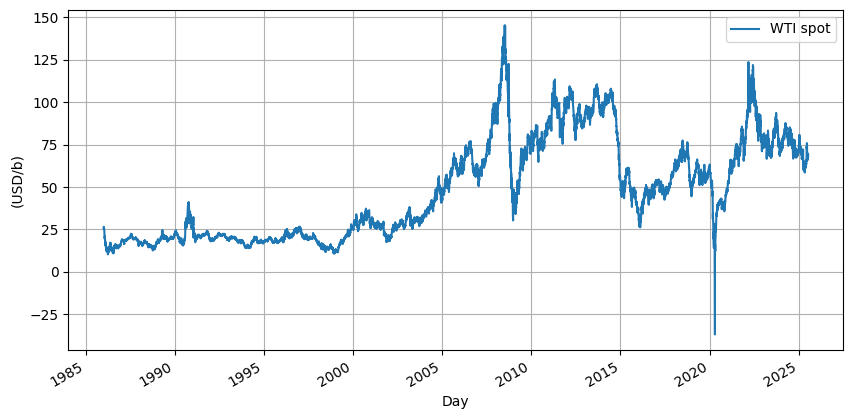

In [29]:
_ = (
    wti.collect()
    .to_pandas()
    .set_index("Day")
    .plot(figsize=(10, 5), grid=True, ylabel="(USD/b)")
)

### DX-Y

***
## Sources

- https://open.spotify.com/episode/0LroaxByEYdHk5Bbzg7CMM

Data :
- https://finance.yahoo.com/quote/DX-Y.NYB/history/
- https://www.eia.gov/dnav/pet/hist/RWTCD.htm
